### Exercise:
The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

##### Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

##### Bonus:
- Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

- Can you label students who are viewing both the web dev and data science curriculum? Can you label students by the program they are in? Can you label users by student vs. staff?

---

In [1]:
import env
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None,
                  names = ['date', 'time', 'page', 'id', 'cohort', 'ip'])
df

,date,time,page,id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    900223 non-null  object 
 1   time    900223 non-null  object 
 2   page    900222 non-null  object 
 3   id      900223 non-null  int64  
 4   cohort  847330 non-null  float64
 5   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [4]:
df.date = df.date.astype('datetime64')
df = df.set_index('date')

In [5]:
df.index.value_counts(sort=False)

2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2021-04-17     478
2021-04-18     659
2021-04-19    2156
2021-04-20    1930
2021-04-21    1131
Name: date, Length: 1182, dtype: int64

#### Exponential Moving Average
Simple Moving Average (SMA) time series are much less noisy than the time series of the original data points. The challenge with SMA, however, is that the values of SMA lag the original values. This means that changes in the trend are only seen with a delay (lag) of L time units. For datasets that contain rapid trend shifts, a SMA may simply be too slow to be useful.

Exponential Moving Average (EMA) helps reduce the lag induced by the use of the SMA. It does this by putting more weight on more recent observations, while the SMA weights all observations equally.

The EMA function looks like this:

EMA*t* = (t0 ( a / (1 + M))) + EMAt−1</sub> (1 - ( a / (1 + M)))
Where:

t0 = Latest value
t−1 = Previous value
EMA*t−1* = Exponential moving average of previous day.
a = the smoothing constant
M = Number of time periods, span of the window
A common value for a is 2

Because the EMA formula is dependent on the previous time period's EMA, how is the first EMA value determined? We will see in a moment.

Instead of calculating EMA manually, we will use the pandas ewm() (Exponential Weighted functions) to compute our EMA. So we just need to define the following:

M = span argument = number of time periods. We will try 7 days, 14 days, 30 days, and 90 days.

In [6]:
df.page.resample('D').count()

date
2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2021-04-17     478
2021-04-18     659
2021-04-19    2156
2021-04-20    1930
2021-04-21    1131
Freq: D, Name: page, Length: 1182, dtype: int64

In [7]:
# 7 day EMA
df.page.resample('D').count().ewm(span=7).mean()

date
2018-01-26     572.000000
2018-01-27     376.571429
2018-01-28     287.243243
2018-01-29     485.737143
2018-01-30     540.235595
                 ...     
2021-04-17    1303.458794
2021-04-18    1142.344096
2021-04-19    1395.758072
2021-04-20    1529.318554
2021-04-21    1429.738915
Freq: D, Name: page, Length: 1182, dtype: float64

In [8]:
# 14 day EMA
df.page.resample('D').count().ewm(span=14).mean()

date
2018-01-26     572.000000
2018-01-27     388.785714
2018-01-28     305.208829
2018-01-29     465.757252
2018-01-30     514.347700
                 ...     
2021-04-17    1348.173718
2021-04-18    1256.283889
2021-04-19    1376.246037
2021-04-20    1450.079899
2021-04-21    1407.535912
Freq: D, Name: page, Length: 1182, dtype: float64

In [9]:
# 30 day EMA
df.page.resample('D').count().ewm(span=30).mean()

date
2018-01-26     572.000000
2018-01-27     395.300000
2018-01-28     315.139578
2018-01-29     457.002386
2018-01-30     501.369064
                 ...     
2021-04-17    1325.179115
2021-04-18    1282.199817
2021-04-19    1338.574023
2021-04-20    1376.730537
2021-04-21    1360.876954
Freq: D, Name: page, Length: 1182, dtype: float64

In [10]:
# 90 day EMA
df.page.resample('D').count().ewm(span=90).mean()

date
2018-01-26     572.000000
2018-01-27     399.100000
2018-01-28     321.030081
2018-01-29     452.545042
2018-01-30     494.228442
                 ...     
2021-04-17    1192.041636
2021-04-18    1180.326435
2021-04-19    1201.769810
2021-04-20    1217.774869
2021-04-21    1215.867729
Freq: D, Name: page, Length: 1182, dtype: float64

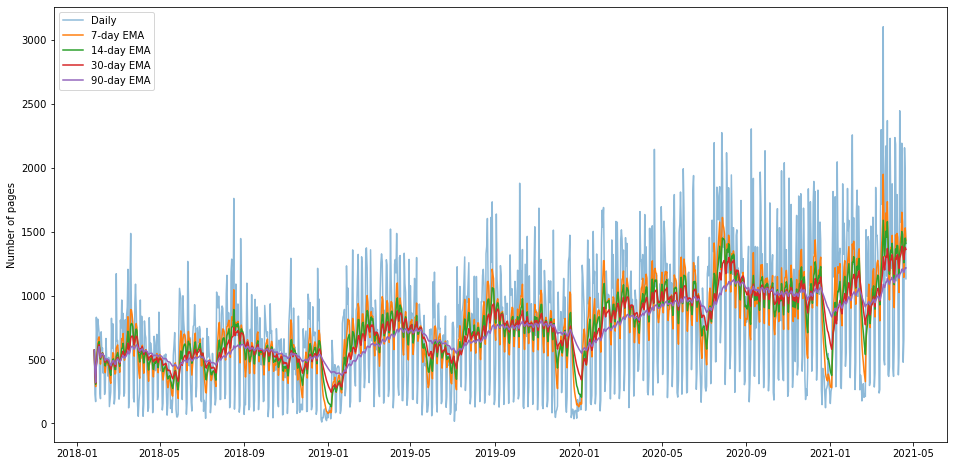

In [11]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df.page.resample('D').count().index, df.page.resample('D').count(), label='Daily', alpha=.5)

ax.plot(df.page.resample('D').count().index, df.page.resample('D').count().ewm(span=7).mean(), label = '7-day EMA')
ax.plot(df.page.resample('D').count().index, df.page.resample('D').count().ewm(span=14).mean(), label = '14-day EMA')
ax.plot(df.page.resample('D').count().index, df.page.resample('D').count().ewm(span=30).mean(), label = '30-day EMA')
ax.plot(df.page.resample('D').count().index, df.page.resample('D').count().ewm(span=90).mean(), label = '90-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [12]:
def acquire_logs(user=env.user, password=env.password, host=env.host):
    pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None,
                  names = ['date', 'time', 'page', 'id', 'cohort', 'ip'])
    return df

In [13]:
def one_user_df_prep(df, user):
    df = df[df.id == user].copy()
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['page'].resample('d').count()
    return pages_one_user

In [14]:
def compute_pct_b(pages_one_user, span, weight, user):
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    bb = pd.concat([ub, lb], axis=1)
    
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['id'] = user
    return my_df

In [15]:
def plot_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [16]:
def find_anomalies(df, user, span, weight, plot=False):
    pages_one_user = one_user_df_prep(df, user)
    
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    if plot:
        plot_bands(my_df, user)
    
    return my_df[my_df.pct_b>1]

---

In [17]:
acquire_logs()

,time,page,id,cohort,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...
2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33
2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33
2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33


In [18]:
#find_anomalies(df, user, span, weight)

In [19]:
df2 = df.reset_index()

In [20]:
weight = 3.5
span = 30
anomalies = pd.DataFrame()

for u in df.id.unique():
#     print(u)
    one_user = find_anomalies(df2, u, span, weight)
    anomalies = pd.concat([anomalies, one_user])

In [21]:
anomalies

,pages_one_user,midband,ub,lb,pct_b,id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


In [22]:
anomalies.sort_values('pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
...,...,...,...,...,...,...
2019-05-21,1,0.064519,0.939144,-0.810106,1.034790,19
2020-11-21,1,0.065202,0.959398,-0.828994,1.022703,410
2019-03-20,1,0.064516,0.939061,-0.810029,1.034841,126


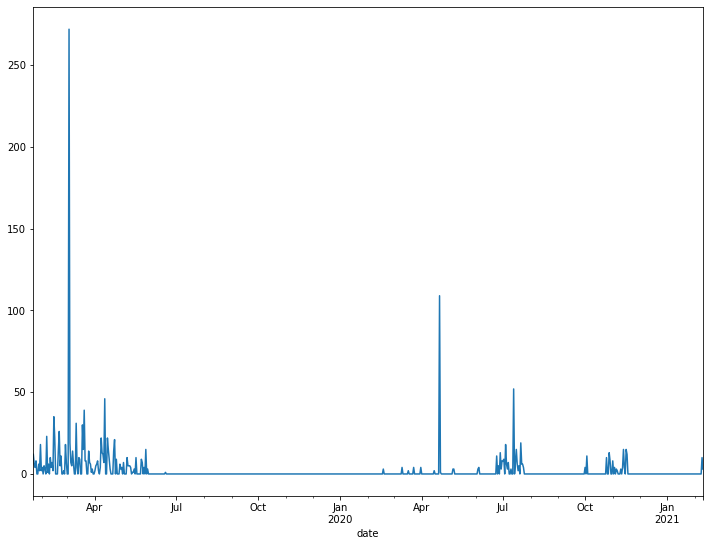

In [23]:
one_user_df_prep(df2, 341).plot(figsize=(12,9))
#plt.xlabel('')
#plt.ylabel('')
#plt.title('')
plt.show()

In [24]:
anomalies.id.value_counts()

88     12
146    11
80     11
18     10
291     9
       ..
526     1
527     1
528     1
206     1
859     1
Name: id, Length: 413, dtype: int64

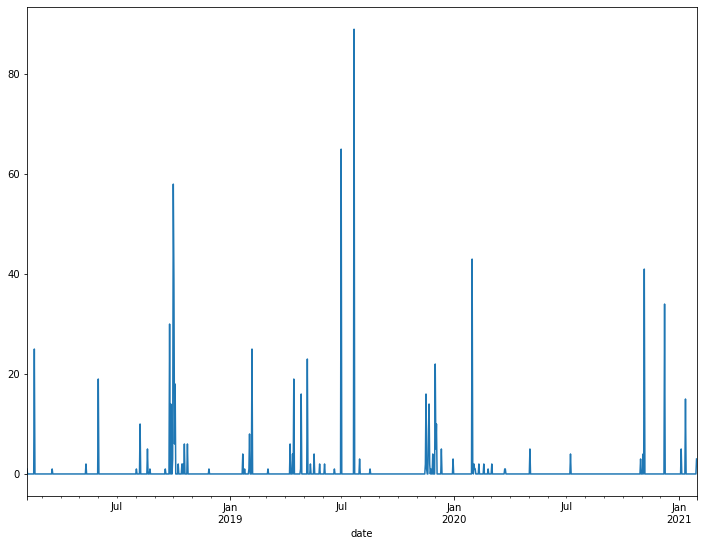

In [25]:
one_user_df_prep(df2, 88).plot(figsize=(12,9))
#plt.xlabel('')
#plt.ylabel('')
#plt.title('')
plt.show()